# Dependencies

Feel free to modify the seed to show different images!  
Just make sure different models are compared on the same set of images.

In [19]:
import matplotlib.pyplot as plt

import torch
from torchvision import transforms
import torchvision.transforms as standard_transforms
from torch.utils.data import DataLoader
from voc import VOC, apply_random_transformation
import random
import numpy as np

torch.manual_seed(2025)

# Mapping Class to Color

In [20]:
'''
color map
0=background, 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle # 6=bus, 7=car, 8=cat, 9=chair, 10=cow, 11=diningtable,
12=dog, 13=horse, 14=motorbike, 15=person # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
'''

noToClass = {
    0:"background", 1:"aeroplane", 2:"bicycle", 3:"bird", 4:"boat", 5:"bottle", 6:"bus", 7:"car", 8:"cat", 9:"chair", 10:"cow", 11:"dining table",
12:"dog", 13:"horse", 14:"motorbike", 15:"person", 16:"potted plant", 17:"sheep", 18:"sofa", 19:"train", 20:"tv/monitor"
}

palette = [0, 0, 0, 128, 0, 0, 0, 128, 0, 128, 128, 0, 0, 0, 128, 128, 0, 128, 0, 128, 128,
           128, 128, 128, 64, 0, 0, 192, 0, 0, 64, 128, 0, 192, 128, 0, 64, 0, 128, 192, 0, 128,
           64, 128, 128, 192, 128, 128, 0, 64, 0, 128, 64, 0, 0, 192, 0, 128, 192, 0, 0, 64, 128]  #3 values- R,G,B for every class. First 3 values for class 0, next 3 for

"""
    Convert palette to map class number to RGB color.

    Expected output, python dictionary with 21 integer keys, each value being a array of size 3
"""
dicti = {}
c = 0
for i in range(0,len(palette),3):
    dicti[c] = palette[i:i+3]
    c+=1

palette = dicti

# DataLoading

In [21]:
# TODO Rewrite the following transformations if needed for your models.
img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
mask_transform = transforms.Compose([
    transforms.ToTensor(),
])

In [22]:
batch_size = 1
DS = VOC("test", img_transform, mask_transform)
DL = DataLoader(DS, batch_size=batch_size, shuffle=True)

first_batch = iter(DL)

Processing data for test data. Found 1449 images.


In [23]:
imgs, msks = [], []
for _ in range(5):
    img, msk = next(first_batch)
    imgs.append(img)
    msks.append(msk)

# Augmentations

In [24]:
augmentations = [('crop', .3), ('horizontal_flip', 1.0)]
for i in range(len(imgs)):
    imgs[i], msks[i] = apply_random_transformation(imgs[i], msks[i], augmentations)

# Show Image

In [25]:
def makeImagesPlotReady(msk, channels = 3):
    """
    Similar to how you converted the images, make the mask tensor matplotlib ready

    args:
        msk or img - input mask tensor of shape [1, 3, 224, 224] or numpy of shape (3, 224, 224)
    returns:
        mask/img - mask that is ready to be plotted using matplotlib.
                    Hint: Numpy class of shape (224, 224, 3)
    """

    return (np.rot90(np.rot90(np.rot90((msk.reshape(channels,224,224)).T))))

In [26]:
for i in range(len(imgs)):
    imgs[i] = imgs[i].squeeze()
    msks[i] = msks[i].squeeze()

In [27]:
def apply_random_transformation(image, mask, transformations):
    for input_tranformation, percent in transformations:
        if random.random() <= percent:
            if input_tranformation == 'crop':
                crop_size = (224, 224)
                scale = (0.9, 1.0)  # Fraction of original image area to be used
                ratio = (3/4, 4/3)   # Aspect ratio range
                
                # Get random crop parameters
                top, left, height, width = standard_transforms.RandomResizedCrop.get_params(image, scale=scale, ratio=ratio)
                
                if mask.dim() == 2:
                    mask = mask.unsqueeze(0) 

                
                image = standard_transforms.functional.resized_crop(image, top, left, height, width, size=(224, 224), interpolation= standard_transforms.functional.InterpolationMode.NEAREST)
                mask = standard_transforms.functional.resized_crop(mask, top, left, height, width, size=(224, 224), interpolation= standard_transforms.functional.InterpolationMode.NEAREST)

                # image = standard_transforms.functional.crop(image, top, left, height, width)
                # mask = standard_transforms.functional.crop(mask, top, left, height, width)
                
                mask = mask.squeeze()
            elif input_tranformation == 'horizontal_flip':
                image = RandomHorizontalFlip(p=1.0)(image)
                mask = RandomHorizontalFlip(p=1.0)(mask)
                
            elif input_tranformation == 'vertical_flip':
                image = RandomVerticalFlip(p=1.0)(image)
                mask = RandomVerticalFlip(p=1.0)(mask)

            else:
                print("Transformation not found")
            
    return image, mask

In [28]:
for i in range(len(imgs)):
    imgs[i], msks[i] = apply_random_transformation(imgs[i], msks[i], [('crop', 1.0)])

In [29]:
output_images = [makeImagesPlotReady(img, 3) for img in imgs]

/tmp/ipykernel_107068/1525982468.py:12: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3637.)
  return (np.rot90(np.rot90(np.rot90((msk.reshape(channels,224,224)).T))))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


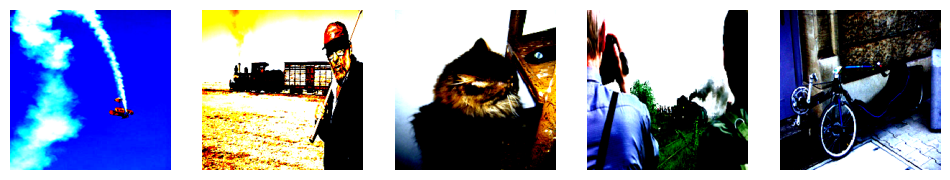

In [30]:
fig, axs = plt.subplots(1, 5, figsize=(12, 6))
axs = axs.flatten()
for i in range(len(output_images)):
    axs[i].imshow(output_images[i])
    axs[i].axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


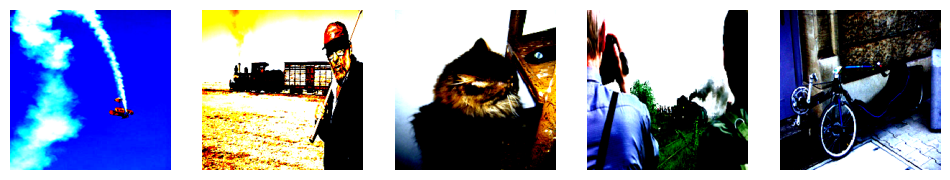

In [31]:
fig, axs = plt.subplots(1, 5, figsize=(12, 6))
axs = axs.flatten()
for i in range(len(output_images)):
    axs[i].imshow(output_images[i])
    axs[i].axis('off')
plt.show()

# Show Ground Truth Mask

In [32]:
def convertMaskToRGB(msk):
    """
    Given a msk, convert it into rgb for visulization.
    """
    msk = (msk*255).int()
    msk[msk==255]=0
    msk = msk.reshape((224, 224))
    
    mask_rgb = np.zeros((3, 224, 224), dtype=np.uint8) # Empty array to store RGB of each class
        
    for idx, color in palette.items(): # Converting to colors
        for j in range(3): # R,G,B            
            mask_rgb[j][msk == idx] = color[j]
            
    return mask_rgb

In [33]:
output_msks = [makeImagesPlotReady(convertMaskToRGB(msk), 3) for msk in msks]

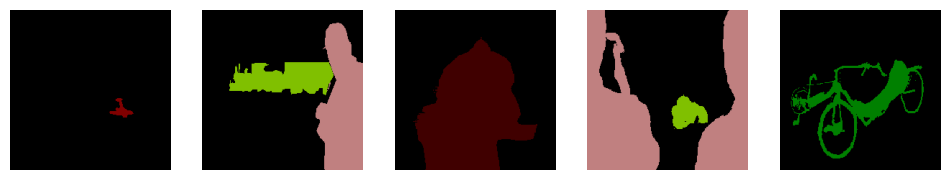

In [34]:
fig, axs = plt.subplots(1, 5, figsize=(12, 6))
axs = axs.flatten()
for i in range(len(output_msks)):
    axs[i].imshow(output_msks[i])
    axs[i].axis('off')
plt.show()

# Plot Image with the mask

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


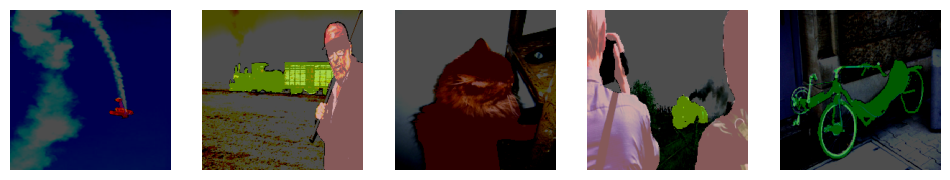

In [35]:
fig, axs = plt.subplots(1, 5, figsize=(12, 6))
axs = axs.flatten()
for i in range(len(output_msks)):
    axs[i].imshow(output_images[i])
    axs[i].imshow(output_msks[i], alpha = 0.7)
    axs[i].axis('off')
plt.show()

# TODO: Visualize Your Model's Predicted Mask

1. Load your model
2. Use the model to predict those images to obtain masks (hint: use your exportModel function)
3. Visualize those masks (without and with images) like we did above

In [36]:
from basic_fcn import FCN

# Comment out the models you don't want
from train import exportModel
# from train_resnet import exportModel

Processing data for train data. Found 1464 images.
Processing data for val data. Found 2913 images.


## Just the masks

In [37]:
input_images = torch.stack(imgs).squeeze(1)
outputs = exportModel(input_images)

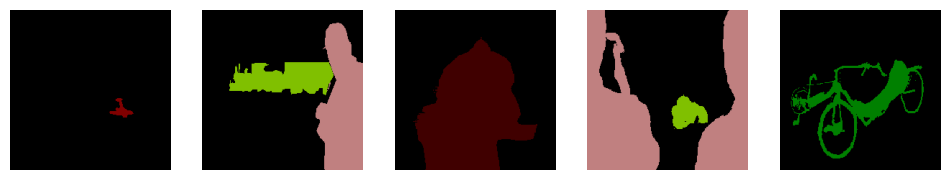

In [38]:
for i in range(len(outputs)):
    mask_formatted = outputs.cpu()[i].argmax(dim=0)  # Shape: (224, 224)

# Convert the mask to RGB
mask_rgb = convertMaskToRGB(mask_formatted)

fig, axs = plt.subplots(1, 5, figsize=(12, 6))
axs = axs.flatten()
for i in range(len(output_msks)):
    axs[i].imshow(output_msks[i])
    axs[i].axis('off')
plt.show()

## The masks on the images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


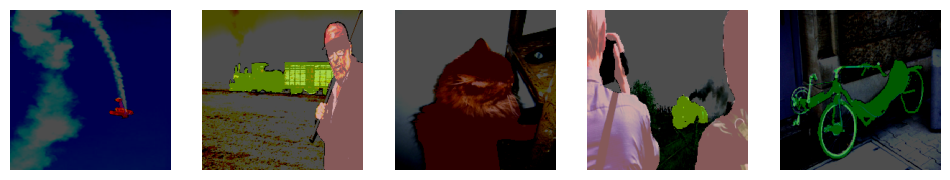

In [39]:
fig, axs = plt.subplots(1, 5, figsize=(12, 6))
axs = axs.flatten()
for i in range(len(output_msks)):
    axs[i].imshow(output_images[i])
    axs[i].imshow(output_msks[i], alpha = 0.7)
    axs[i].axis('off')
plt.show()